# Introduction
___
* Add comments, markdowns, and clean the notebook!
* May be add back the polynomial steps at the end.
* Add visualizations

In [1]:
# import the libraries necessarry for cleaning and eda
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style='white')
plt.style.use('seaborn')

pd.set_option('display.max_columns', 100)  # display max rows and columns
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', lambda x: '%.2f' % x)  # avoid outputing scientific notation

## Data Exploration & Cleaning
___

In [2]:
nym = pd.read_csv('nym_mlb.txt', sep = ',')  # read in the text file

In [3]:
print(nym.shape)  # check the dimensions of the 
nym.head()  # print the first 5 rows

(1620, 11)


,game#,date,h/a,opponent,w-l,rank,games_behind,d/n,attendance,cli,streak
0,1,Monday Apr 5,NaN,FLA,1-0,1,Tied,D,41245.00,1.08,+
1,2,Wednesday Apr 7,NaN,FLA,1-1,3,1.0,N,38863.00,1.14,-
2,3,Thursday Apr 8,NaN,FLA,1-2,4,1.0,N,25982.00,1.01,--
3,4,Friday Apr 9,NaN,WSN,2-2,2,1.0,N,28055.00,0.98,+
4,5,Saturday Apr 10,NaN,WSN,2-3,4,2.0,D,33044.00,1.06,-


* the `h/a` column indicates whether the game was played citifield, which is the Mets homeground, or at away ground.
* '@' value indicates that it was played at the opponents home turf.

In [4]:
nym['h/a'].value_counts(dropna=False)  # the games should be equally distributed in both classes

@      810
NaN    810
Name: h/a, dtype: int64

In [5]:
# We only wantthe games that were played at the Ny Mets home stadium
nym_home = nym[nym['h/a'] != '@'].copy()
nym_home.shape

(810, 11)

81, 162, 243, 324, 405, 486, 567, 648, 729

In [6]:
import warnings
from pandas.core.common import SettingWithCopyWarning

warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

In [7]:
nym_home['date'][:81] = nym_home['date'][:81] + ' 2010'
nym_home['date'][81:162] = nym_home['date'][81:162] + ' 2011'
nym_home['date'][162:243] = nym_home['date'][162:243] + ' 2012'
nym_home['date'][243:324] = nym_home['date'][243:324] + ' 2013'
nym_home['date'][324:405] = nym_home['date'][324:405] + ' 2014'
nym_home['date'][405:486] = nym_home['date'][405:486] + ' 2015'
nym_home['date'][486:567] = nym_home['date'][486:567] + ' 2016'
nym_home['date'][567:648] = nym_home['date'][567:648] + ' 2017'
nym_home['date'][648:729] = nym_home['date'][648:729] + ' 2018'
nym_home['date'][729:] = nym_home['date'][729:] + ' 2019'

In [8]:
nym_home.head()

,game#,date,h/a,opponent,w-l,rank,games_behind,d/n,attendance,cli,streak
0,1,Monday Apr 5 2010,NaN,FLA,1-0,1,Tied,D,41245.00,1.08,+
1,2,Wednesday Apr 7 2010,NaN,FLA,1-1,3,1.0,N,38863.00,1.14,-
2,3,Thursday Apr 8 2010,NaN,FLA,1-2,4,1.0,N,25982.00,1.01,--
3,4,Friday Apr 9 2010,NaN,WSN,2-2,2,1.0,N,28055.00,0.98,+
4,5,Saturday Apr 10 2010,NaN,WSN,2-3,4,2.0,D,33044.00,1.06,-


In [9]:
nym_home.info()  # check the column types and how many null values they have

<class 'pandas.core.frame.DataFrame'>
Int64Index: 810 entries, 0 to 1619
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   game#         810 non-null    int64  
 1   date          810 non-null    object 
 2   h/a           0 non-null      object 
 3   opponent      810 non-null    object 
 4   w-l           810 non-null    object 
 5   rank          810 non-null    int64  
 6   games_behind  810 non-null    object 
 7   d/n           810 non-null    object 
 8   attendance    797 non-null    float64
 9   cli           810 non-null    float64
 10  streak        810 non-null    object 
dtypes: float64(2), int64(2), object(7)
memory usage: 75.9+ KB


* As expected, `h/a` column should have no more non-null values.
* Attendance is missing for 13 games. Let's inspect these observations.

In [10]:
nym_home.drop(columns= ['h/a','w-l'], inplace= True)

In [11]:
nym_home[nym_home['attendance'].isnull() == True]  # print the rows with null attendance

,game#,date,opponent,rank,games_behind,d/n,attendance,cli,streak
19,20,Tuesday Apr 27 (1) 2010,LAD,1,up 0.5,D,nan,1.02,+++++
156,157,Wednesday Sep 29 (1) 2010,MIL,3,17.5,D,nan,0.00,-
173,12,Thursday Apr 14 (1) 2011,COL,5,5.5,D,nan,0.78,----
292,131,Monday Aug 29 (1) 2011,FLA,3,21.0,D,nan,0.00,+++
303,142,Thursday Sep 8 (1) 2011,ATL,3,23.5,D,nan,0.02,-
338,15,Monday Apr 23 (1) 2012,SFG,3,4.0,D,nan,0.95,-
632,147,Saturday Sep 14 (1) 2013,MIA,4,23.0,D,nan,0.00,-
695,48,Sunday May 25 (1) 2014,ARI,4,6.0,D,nan,0.72,--
1069,98,Tuesday Jul 26 (1) 2016,STL,3,4.5,D,nan,1.53,-
1289,156,Monday Sep 25 (1) 2017,ATL,4,28.5,D,nan,0.00,---


* The data values of these rows have `'(1)'` attached at the end. This might indicate that two games were played that day against the same opponent.
* Let's inspect couple of the rows right after these missing value rows.

In [12]:
nym_home[(nym_home.index == 1383) | (nym_home.index == 1441)]

,game#,date,opponent,rank,games_behind,d/n,attendance,cli,streak
1383,88,Monday Jul 9 (2) 2018,PHI,4,13.5,N,24139.00,0.06,-
1441,146,Thursday Sep 13 (2) 2018,MIA,4,14.0,N,22640.00,0.00,+++


* We were correct in guessing that these were double-header games and attendance was only recorded for the second game.
* We can either remove these rows and or impute the values with the actual attendaces from the second game of the day.
* Tickets for double-headers are usually sold only once. Therefore, we would be double counting values if we impute the missing numbers.

In [13]:
import re  # import the RegEx module
pattern = "\(2\)"

impute_vals = nym_home[nym_home['date'].str.contains(pattern)]['attendance']
keys = list(impute_vals.index - 1)
values = list(impute_vals.values)

In [14]:
impute_dict = dict(zip(keys, values))
impute_dict

{19: 32012.0,
 58: 28072.0,
 156: 28280.0,
 173: 25758.0,
 292: 29335.0,
 303: 25953.0,
 318: 32437.0,
 338: 23866.0,
 632: 25175.0,
 695: 30785.0,
 969: 41480.0,
 1069: 37116.0,
 1289: 21698.0,
 1382: 24139.0,
 1440: 22640.0,
 1569: 29645.0}

In [15]:
nym_home['attendance'].fillna(impute_dict, inplace= True, )

In [16]:
nym_home.isnull().sum().any()

False

In [17]:
import re  # import the RegEx module

pattern = "\([12]\)"
nym_home['date'] = nym_home['date'].str.replace(pattern, '')

In [18]:
# transform the values in the streak column into integers indicating winning/losing streak
print(nym_home['streak'].nunique())
nym_home['streak'].unique()  # check the current number and types of unique streak values

19


array(['+', '-', '--', '++', '+++', '++++', '+++++', '++++++', '+++++++',
       '---', '----', '-----', '------', '++++++++', '+++++++++',
       '++++++++++', '+++++++++++', '-------', '--------'], dtype=object)

In [19]:
nym_home['streak'] = nym_home['streak'].apply(lambda x: len(x) * -1 if '-' in x else len(x))

In [20]:
print(nym_home['streak'].nunique())
nym_home.streak.unique()  # check the transformed streak values

19


array([ 1, -1, -2,  2,  3,  4,  5,  6,  7, -3, -4, -5, -6,  8,  9, 10, 11,
       -7, -8])

## Feature Engineering
___

In [21]:
# convert d/n column to boolean column indicating if it was a night game or not
nym_home['d/n'].value_counts() 

N    539
D    271
Name: d/n, dtype: int64

In [22]:
# if it's a night game replace with 1 and if not replace with 0
nym_home['d/n'] = nym_home['d/n'].apply(lambda x: 1 if x == 'N' else 0)
nym_home['d/n'].value_counts()

1    539
0    271
Name: d/n, dtype: int64

In [23]:
nym_home.rename(columns= {'d/n':'night_game'}, inplace= True)  # rename the column appropriately

In [24]:
# nym_home.games_behind.value_counts(dropna=False)

In [25]:
nym_home['games_behind'] = nym_home['games_behind'].str.replace('Tied', '0.0').str.replace('up ', '+')

In [26]:
nym_home['games_behind'] = nym_home['games_behind'].apply(lambda x: float(x) * -1 if '+' not in x else float(x))

In [27]:
print(nym_home.shape)
nym_home.head()

(810, 9)


,game#,date,opponent,rank,games_behind,night_game,attendance,cli,streak
0,1,Monday Apr 5 2010,FLA,1,-0.00,0,41245.00,1.08,1
1,2,Wednesday Apr 7 2010,FLA,3,-1.00,1,38863.00,1.14,-1
2,3,Thursday Apr 8 2010,FLA,4,-1.00,1,25982.00,1.01,-2
3,4,Friday Apr 9 2010,WSN,2,-1.00,1,28055.00,0.98,1
4,5,Saturday Apr 10 2010,WSN,4,-2.00,0,33044.00,1.06,-1


In [28]:
nym_home['games_left_in_season'] = 162 - nym_home['game#']

In [29]:
nym_home ['day_of_week'] = nym_home['date'].apply(lambda x : x.split()[0])

In [30]:
nym_home['month'] = nym_home['date'].apply(lambda x : x.split()[1]) 

In [31]:
nym_home['games_left-games_behind'] = nym_home['games_left_in_season'] - np.abs(nym_home['games_behind'])

In [32]:
nym_home['weekend'] = nym_home['day_of_week'].apply(lambda x: 1 if (x == 'Saturday') | (x == 'Sunday') else 0 )

In [33]:
nym_home['weekend_x_night'] = nym_home['weekend'] * nym_home['night_game']

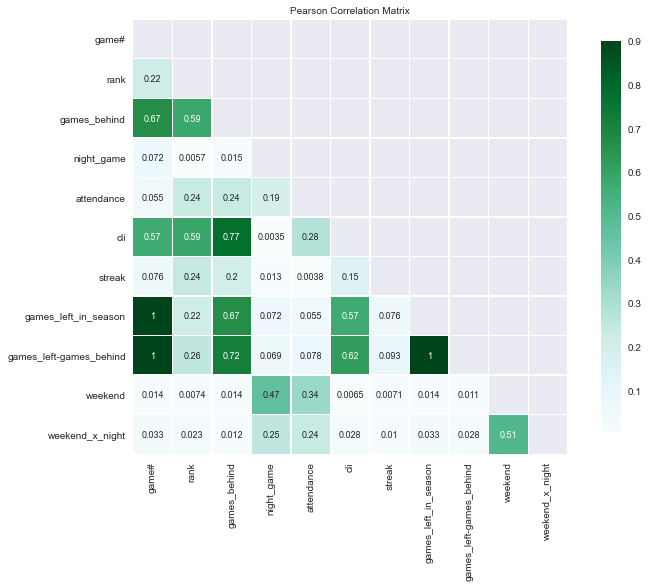

In [34]:
mask = np.zeros_like(nym_home.corr().abs(), dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True 

f, ax = plt.subplots(figsize=(12, 8))
plt.title('Pearson Correlation Matrix',fontsize=10)

sns.heatmap(nym_home.corr().abs(),linewidths=0.25,vmax=0.9,square=True,cmap="BuGn", #"BuGn_r" to reverse 
            linecolor='w',annot=True,annot_kws={"size":9},mask=mask,cbar_kws={"shrink": .9});
plt.show()

In [35]:
nym_dummy = pd.get_dummies(nym_home, columns= ['month','day_of_week','opponent'], 
               prefix = {'month': '', 'day_of_week': '', 'opponent': ''}, prefix_sep = '' )

In [36]:
nym_dummy.drop(columns=['date', 'Saturday', 'Sunday', 'game#', 'games_left_in_season'], inplace= True)

In [37]:
# standardize the dataframe except for the target variable
nym_normal = (nym_dummy - nym_dummy.mean())/(nym_dummy.std())

In [38]:
nym_normal['attendance'] = nym_dummy['attendance']  # plug back in non-normalized target

In [39]:
print(nym_normal.shape)
nym_normal.head()

(810, 51)


,rank,games_behind,night_game,attendance,cli,streak,games_left-games_behind,weekend,weekend_x_night,Apr,Aug,Jul,Jun,Mar,May,Oct,Sep,Friday,Monday,Thursday,Tuesday,Wednesday,ARI,ATL,BAL,BOS,CHC,CHW,CIN,CLE,COL,DET,FLA,HOU,KCR,LAA,LAD,MIA,MIL,MIN,NYY,OAK,PHI,PIT,SDP,SFG,STL,TBR,TEX,TOR,WSN
0,-1.88,1.13,-1.41,41245.00,0.73,0.40,1.68,-0.69,-0.36,2.29,-0.47,-0.42,-0.41,-0.06,-0.46,-0.09,-0.46,-0.42,2.96,-0.37,-0.41,-0.42,-0.21,-0.36,-0.09,-0.06,-0.21,-0.08,-0.21,-0.06,-0.21,-0.11,6.63,-0.12,-0.08,-0.09,-0.20,-0.32,-0.20,-0.10,-0.18,-0.10,-0.36,-0.21,-0.20,-0.21,-0.21,-0.06,-0.08,-0.07,-0.37
1,-0.04,0.99,0.71,38863.00,0.84,-0.39,1.64,-0.69,-0.36,2.29,-0.47,-0.42,-0.41,-0.06,-0.46,-0.09,-0.46,-0.42,-0.34,-0.37,-0.41,2.36,-0.21,-0.36,-0.09,-0.06,-0.21,-0.08,-0.21,-0.06,-0.21,-0.11,6.63,-0.12,-0.08,-0.09,-0.20,-0.32,-0.20,-0.10,-0.18,-0.10,-0.36,-0.21,-0.20,-0.21,-0.21,-0.06,-0.08,-0.07,-0.37
2,0.89,0.99,0.71,25982.00,0.60,-0.78,1.62,-0.69,-0.36,2.29,-0.47,-0.42,-0.41,-0.06,-0.46,-0.09,-0.46,-0.42,-0.34,2.68,-0.41,-0.42,-0.21,-0.36,-0.09,-0.06,-0.21,-0.08,-0.21,-0.06,-0.21,-0.11,6.63,-0.12,-0.08,-0.09,-0.20,-0.32,-0.20,-0.10,-0.18,-0.10,-0.36,-0.21,-0.20,-0.21,-0.21,-0.06,-0.08,-0.07,-0.37
3,-0.96,0.99,0.71,28055.00,0.54,0.40,1.60,-0.69,-0.36,2.29,-0.47,-0.42,-0.41,-0.06,-0.46,-0.09,-0.46,2.35,-0.34,-0.37,-0.41,-0.42,-0.21,-0.36,-0.09,-0.06,-0.21,-0.08,-0.21,-0.06,-0.21,-0.11,-0.15,-0.12,-0.08,-0.09,-0.20,-0.32,-0.20,-0.10,-0.18,-0.10,-0.36,-0.21,-0.20,-0.21,-0.21,-0.06,-0.08,-0.07,2.71
4,0.89,0.86,-1.41,33044.00,0.69,-0.39,1.57,1.45,-0.36,2.29,-0.47,-0.42,-0.41,-0.06,-0.46,-0.09,-0.46,-0.42,-0.34,-0.37,-0.41,-0.42,-0.21,-0.36,-0.09,-0.06,-0.21,-0.08,-0.21,-0.06,-0.21,-0.11,-0.15,-0.12,-0.08,-0.09,-0.20,-0.32,-0.20,-0.10,-0.18,-0.10,-0.36,-0.21,-0.20,-0.21,-0.21,-0.06,-0.08,-0.07,2.71


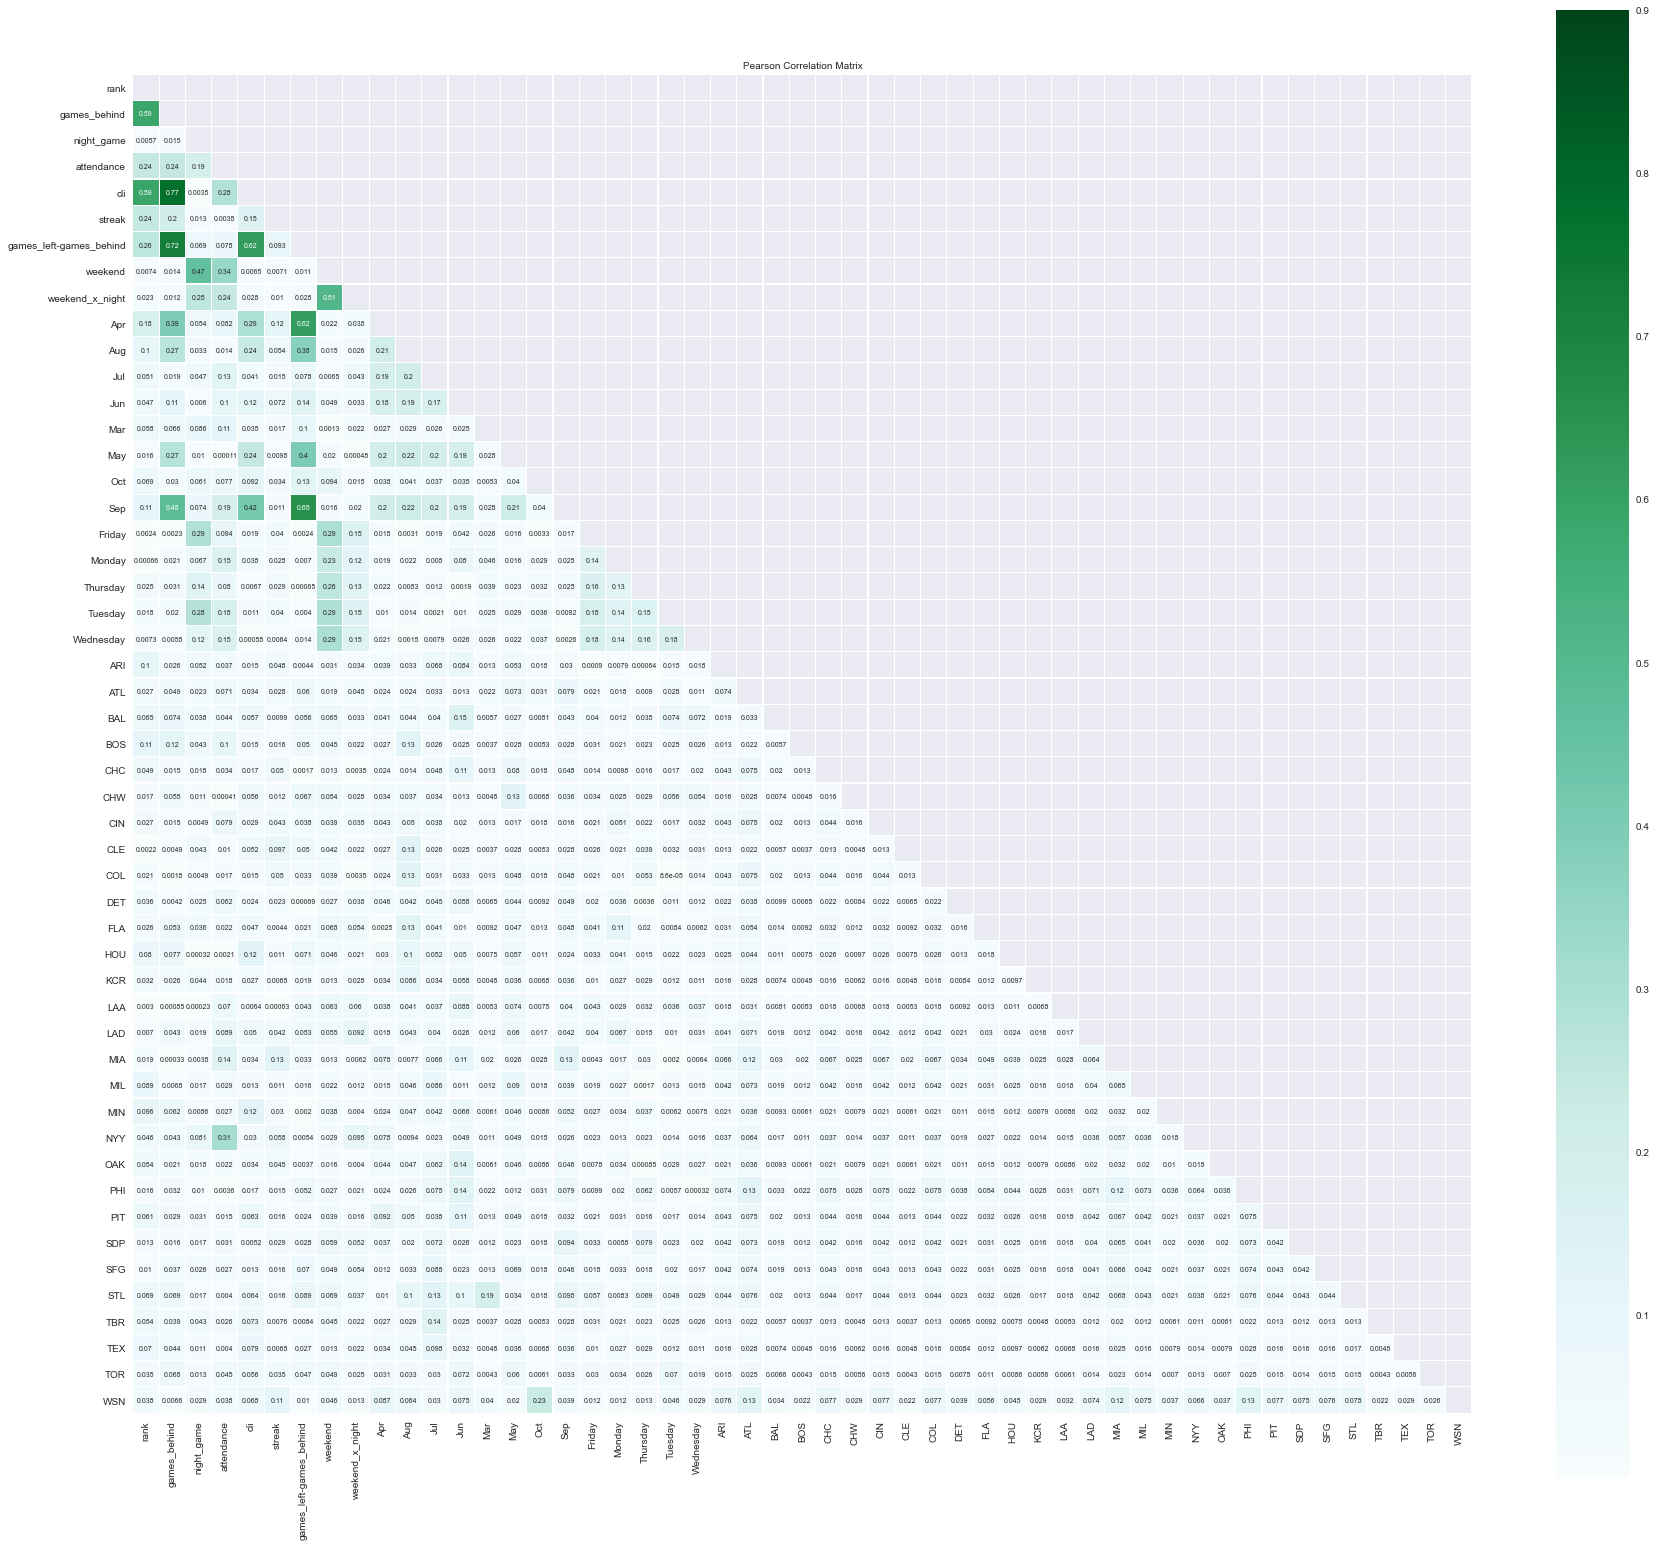

In [40]:
mask = np.zeros_like(nym_normal.corr().abs(), dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True 

f, ax = plt.subplots(figsize=(30, 30))
plt.title('Pearson Correlation Matrix',fontsize=10)

sns.heatmap(nym_normal.corr().abs(),linewidths=0.15,vmax=0.9,square=True,cmap="BuGn", #"BuGn_r" to reverse 
            linecolor='w',annot=True,annot_kws={"size":7},mask=mask,cbar_kws={"shrink": .9});
plt.show()

In [40]:
corr = nym_normal.corr().abs()['attendance']
corr[corr > 0.05].sort_values(ascending = False)

attendance                1.00
weekend                   0.34
NYY                       0.31
cli                       0.28
weekend_x_night           0.24
rank                      0.24
games_behind              0.24
Sep                       0.19
night_game                0.19
Tuesday                   0.18
Wednesday                 0.15
Monday                    0.15
MIA                       0.14
Jul                       0.13
Mar                       0.11
BOS                       0.10
Jun                       0.10
Friday                    0.09
LAD                       0.09
Apr                       0.08
Thursday                  0.08
CIN                       0.08
games_left-games_behind   0.08
Oct                       0.08
ATL                       0.07
LAA                       0.07
DET                       0.06
Name: attendance, dtype: float64

In [41]:
from statsmodels.formula.api import ols

lr_model = ols(formula='attendance~weekend+NYY+cli+rank+MIA+Friday', 
               data=nym_normal).fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             attendance   R-squared:                       0.350
Model:                            OLS   Adj. R-squared:                  0.345
Method:                 Least Squares   F-statistic:                     72.17
Date:                Sun, 01 Nov 2020   Prob (F-statistic):           6.25e-72
Time:                        20:17:52   Log-Likelihood:                -8054.2
No. Observations:                 810   AIC:                         1.612e+04
Df Residuals:                     803   BIC:                         1.616e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept       3e+04    177.751    168.753      0.000    2.96e+04    3.03e+04
weekend     2414.9004    186.262     12.965      0.000    2049.283    2780.518
NYY         1888.1716    178.530     10.576      0.000    1537.732    2238.611
cli         1265.4090    221.301      5.718      0.000     831.012    1699.806
rank        -833.6528    221.274     -3.768      0.000   -1267.997    -399.309
MIA         -786.4440    178.495     -4.406      0.000   -1136.815    -436.073
Friday      1228.9987    186.253      6.599      0.000     863.398    1594.600
==============================================================================
Omnibus:                       20.088   Durbin-Watson:                   1.139
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.207
Skew:                           0.391   Prob(JB):                     2.48e-05
Kurtosis:                       2.871   Cond. No.                         1.99
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Train-Test Split
___

In [42]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

In [43]:
target = nym_normal['attendance']
features = nym_normal.drop(columns= 'attendance')

In [44]:
features.shape

(810, 50)

In [83]:
print('Average attendance for 8 seasons is:', int(target.mean()))
target.shape

Average attendance for 8 seasons is: 29996


(810,)

In [84]:
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=9,test_size=0.20)

## Modelling Process
____

In [85]:
#instantiate a linear regression object
lm = LinearRegression()

#fit the linear regression to the data
lm = lm.fit(X_train, y_train)

y_train_pred = lm.predict(X_train)
#use fitted model to predict on the test examples
y_test_pred = lm.predict(X_test)

train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
#evaluate the predictions on the test examples
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

print('Training RMSE:' , int(train_rmse))
print('Testing RMSE:' , int(test_rmse))

Training RMSE: 4612
Testing RMSE: 4656


In [66]:
rmse_dict = {'Linear Regression': test_rmse}
rmse_dict

{'Linear Regression': 4656.624968786757}

In [88]:
mean_absolute_error(y_test, y_test_pred)

3778.3513819038762

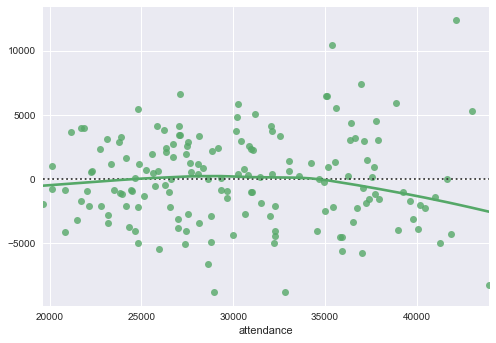

In [86]:
sns.residplot( y_test, y_test_pred,lowess=True, color="g")

## K-Best Model

In [67]:
from sklearn.feature_selection import SelectKBest, f_regression,mutual_info_regression

selector = SelectKBest(f_regression, k=21)
selector.fit(X_train, y_train)

SelectKBest(k=21, score_func=<function f_regression at 0x7fe899377040>)

In [68]:
selected_columns = X_train.columns[selector.get_support()]
removed_columns = X_train.columns[~selector.get_support()]

In [69]:
print(removed_columns)

Index(['streak', 'Aug', 'Jun', 'May', 'Oct', 'Thursday', 'ARI', 'BAL', 'CHC',
       'CHW', 'CLE', 'COL', 'FLA', 'HOU', 'KCR', 'LAA', 'LAD', 'MIL', 'MIN',
       'OAK', 'PHI', 'PIT', 'SDP', 'SFG', 'STL', 'TBR', 'TEX', 'TOR', 'WSN'],
      dtype='object')


In [70]:
print(selected_columns)

Index(['rank', 'games_behind', 'night_game', 'cli', 'games_left-games_behind',
       'weekend', 'weekend_x_night', 'Apr', 'Jul', 'Mar', 'Sep', 'Friday',
       'Monday', 'Tuesday', 'Wednesday', 'ATL', 'BOS', 'CIN', 'DET', 'MIA',
       'NYY'],
      dtype='object')


In [71]:
lm_kbest = LinearRegression()

lm_kbest = lm_kbest.fit(X_train[selected_columns], y_train)  #fit the linear regression to the data

train_kbest = lm_kbest.predict(X_train[selected_columns])  # predict on the train and test k-best
test_kbest = lm_kbest.predict(X_test[selected_columns])

trainK_rmse = np.sqrt(mean_squared_error(y_train, train_kbest))  # calculate the train-test RMSE
testK_rmse = np.sqrt(mean_squared_error(y_test, test_kbest))

print('Training RMSE:' , int(trainK_rmse))
print('Testing RMSE:' , int(testK_rmse))

Training RMSE: 4706
Testing RMSE: 4639


In [72]:
rmse_dict['k-Best'] = testK_rmse
rmse_dict

{'Linear Regression': 4656.624968786757, 'k-Best': 4639.1910644042855}

## Polynomial Features

In [73]:
poly_2 = PolynomialFeatures(degree=2, include_bias=False)
poly2_data = poly_2.fit_transform(features)
poly2_columns = poly_2.get_feature_names(features.columns)
df_poly2 = pd.DataFrame(poly2_data, columns=poly2_columns)
df_poly2.head()

,rank,games_behind,night_game,cli,streak,games_left-games_behind,weekend,weekend_x_night,Apr,Aug,Jul,Jun,Mar,May,Oct,Sep,Friday,Monday,Thursday,Tuesday,Wednesday,ARI,ATL,BAL,BOS,CHC,CHW,CIN,CLE,COL,DET,FLA,HOU,KCR,LAA,LAD,MIA,MIL,MIN,NYY,OAK,PHI,PIT,SDP,SFG,STL,TBR,TEX,TOR,WSN,...,OAK STL,OAK TBR,OAK TEX,OAK TOR,OAK WSN,PHI^2,PHI PIT,PHI SDP,PHI SFG,PHI STL,PHI TBR,PHI TEX,PHI TOR,PHI WSN,PIT^2,PIT SDP,PIT SFG,PIT STL,PIT TBR,PIT TEX,PIT TOR,PIT WSN,SDP^2,SDP SFG,SDP STL,SDP TBR,SDP TEX,SDP TOR,SDP WSN,SFG^2,SFG STL,SFG TBR,SFG TEX,SFG TOR,SFG WSN,STL^2,STL TBR,STL TEX,STL TOR,STL WSN,TBR^2,TBR TEX,TBR TOR,TBR WSN,TEX^2,TEX TOR,TEX WSN,TOR^2,TOR WSN,WSN^2
0,-1.88,1.13,-1.41,0.73,0.40,1.68,-0.69,-0.36,2.29,-0.47,-0.42,-0.41,-0.06,-0.46,-0.09,-0.46,-0.42,2.96,-0.37,-0.41,-0.42,-0.21,-0.36,-0.09,-0.06,-0.21,-0.08,-0.21,-0.06,-0.21,-0.11,6.63,-0.12,-0.08,-0.09,-0.20,-0.32,-0.20,-0.10,-0.18,-0.10,-0.36,-0.21,-0.20,-0.21,-0.21,-0.06,-0.08,-0.07,-0.37,...,0.02,0.01,0.01,0.01,0.04,0.13,0.07,0.07,0.07,0.08,0.02,0.03,0.03,0.13,0.04,0.04,0.04,0.04,0.01,0.02,0.01,0.08,0.04,0.04,0.04,0.01,0.02,0.01,0.07,0.04,0.04,0.01,0.02,0.01,0.08,0.05,0.01,0.02,0.01,0.08,0.00,0.00,0.00,0.02,0.01,0.01,0.03,0.00,0.03,0.14
1,-0.04,0.99,0.71,0.84,-0.39,1.64,-0.69,-0.36,2.29,-0.47,-0.42,-0.41,-0.06,-0.46,-0.09,-0.46,-0.42,-0.34,-0.37,-0.41,2.36,-0.21,-0.36,-0.09,-0.06,-0.21,-0.08,-0.21,-0.06,-0.21,-0.11,6.63,-0.12,-0.08,-0.09,-0.20,-0.32,-0.20,-0.10,-0.18,-0.10,-0.36,-0.21,-0.20,-0.21,-0.21,-0.06,-0.08,-0.07,-0.37,...,0.02,0.01,0.01,0.01,0.04,0.13,0.07,0.07,0.07,0.08,0.02,0.03,0.03,0.13,0.04,0.04,0.04,0.04,0.01,0.02,0.01,0.08,0.04,0.04,0.04,0.01,0.02,0.01,0.07,0.04,0.04,0.01,0.02,0.01,0.08,0.05,0.01,0.02,0.01,0.08,0.00,0.00,0.00,0.02,0.01,0.01,0.03,0.00,0.03,0.14
2,0.89,0.99,0.71,0.60,-0.78,1.62,-0.69,-0.36,2.29,-0.47,-0.42,-0.41,-0.06,-0.46,-0.09,-0.46,-0.42,-0.34,2.68,-0.41,-0.42,-0.21,-0.36,-0.09,-0.06,-0.21,-0.08,-0.21,-0.06,-0.21,-0.11,6.63,-0.12,-0.08,-0.09,-0.20,-0.32,-0.20,-0.10,-0.18,-0.10,-0.36,-0.21,-0.20,-0.21,-0.21,-0.06,-0.08,-0.07,-0.37,...,0.02,0.01,0.01,0.01,0.04,0.13,0.07,0.07,0.07,0.08,0.02,0.03,0.03,0.13,0.04,0.04,0.04,0.04,0.01,0.02,0.01,0.08,0.04,0.04,0.04,0.01,0.02,0.01,0.07,0.04,0.04,0.01,0.02,0.01,0.08,0.05,0.01,0.02,0.01,0.08,0.00,0.00,0.00,0.02,0.01,0.01,0.03,0.00,0.03,0.14
3,-0.96,0.99,0.71,0.54,0.40,1.60,-0.69,-0.36,2.29,-0.47,-0.42,-0.41,-0.06,-0.46,-0.09,-0.46,2.35,-0.34,-0.37,-0.41,-0.42,-0.21,-0.36,-0.09,-0.06,-0.21,-0.08,-0.21,-0.06,-0.21,-0.11,-0.15,-0.12,-0.08,-0.09,-0.20,-0.32,-0.20,-0.10,-0.18,-0.10,-0.36,-0.21,-0.20,-0.21,-0.21,-0.06,-0.08,-0.07,2.71,...,0.02,0.01,0.01,0.01,-0.27,0.13,0.07,0.07,0.07,0.08,0.02,0.03,0.03,-0.97,0.04,0.04,0.04,0.04,0.01,0.02,0.01,-0.57,0.04,0.04,0.04,0.01,0.02,0.01,-0.55,0.04,0.04,0.01,0.02,0.01,-0.56,0.05,0.01,0.02,0.01,-0.58,0.00,0.00,0.00,-0.17,0.01,0.01,-0.21,0.00,-0.19,7.34
4,0.89,0.86,-1.41,0.69,-0.39,1.57,1.45,-0.36,2.29,-0.47,-0.42,-0.41,-0.06,-0.46,-0.09,-0.46,-0.42,-0.34,-0.37,-0.41,-0.42,-0.21,-0.36,-0.09,-0.06,-0.21,-0.08,-0.21,-0.06,-0.21,-0.11,-0.15,-0.12,-0.08,-0.09,-0.20,-0.32,-0.20,-0.10,-0.18,-0.10,-0.36,-0.21,-0.20,-0.21,-0.21,-0.06,-0.08,-0.07,2.71,...,0.02,0.01,0.01,0.01,-0.27,0.13,0.07,0.07,0.07,0.08,0.02,0.03,0.03,-0.97,0.04,0.04,0.04,0.04,0.01,0.02,0.01,-0.57,0.04,0.04,0.04,0.01,0.02,0.01,-0.55,0.04,0.04,0.01,0.02,0.01,-0.56,0.05,0.01,0.02,0.01,-0.58,0.00,0.00,0.00,-0.17,0.01,0.01,-0.21,0.00,-0.19,7.34


In [74]:
X_train, X_test, y_train, y_test = train_test_split(df_poly2, target, random_state=9,test_size=0.2)

### Polynomial: Lasso Model

In [51]:
from sklearn.linear_model import Lasso, Ridge

lasso = Lasso(alpha=0.001, normalize=False, max_iter=100000, )

lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_pred = lasso.predict(X_test)

train_rmse_lasso01 = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse_lasso01 = np.sqrt(mean_squared_error(y_test, y_pred))

print('Training RMSE:', int(train_rmse_lasso01) )
print('Testing RMSE:', int(test_rmse_lasso01) )

Training RMSE: 2100
Testing RMSE: 31772


/Users/farhan/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1418466425.461198, tolerance: 2610050.3502444443
  model = cd_fast.enet_coordinate_descent(


In [75]:
rmse_dict['Poly-Lasso'] = test_rmse_lasso01
rmse_dict

{'Linear Regression': 4656.624968786757,
 'k-Best': 4639.1910644042855,
 'Poly-Lasso': 31772.614485886657}

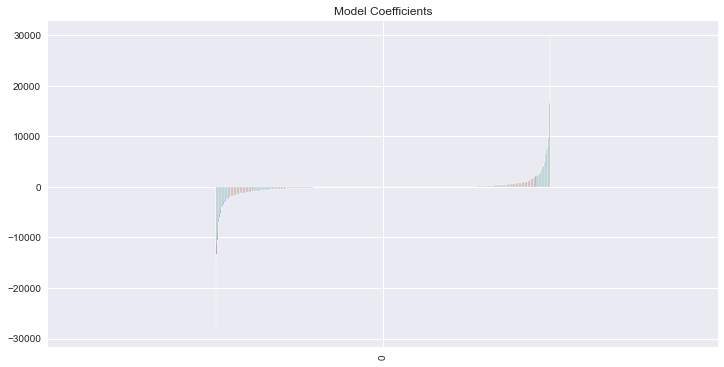

In [53]:
lasso_coef01 = pd.DataFrame(data=lasso.coef_).T
lasso_coef01.columns = X_train.columns
lasso_coef01 = lasso_coef01.T.sort_values(by=0).T
lasso_coef01.plot(kind='bar', title='Model Coefficients', legend=False, figsize=(12,6))

### Polynomial: K-Best Model

In [76]:
selector = SelectKBest(f_regression, k=30)

selector.fit(X_train, y_train)

SelectKBest(k=30, score_func=<function f_regression at 0x7fe899377040>)

In [77]:
selected_columns = X_train.columns[selector.get_support()]
removed_columns = X_train.columns[~selector.get_support()]

In [78]:
print(removed_columns)

Index(['rank', 'night_game', 'streak', 'games_left-games_behind',
       'weekend_x_night', 'Apr', 'Aug', 'Jul', 'Jun', 'Mar',
       ...
       'TBR^2', 'TBR TEX', 'TBR TOR', 'TBR WSN', 'TEX^2', 'TEX TOR', 'TEX WSN',
       'TOR^2', 'TOR WSN', 'WSN^2'],
      dtype='object', length=1295)


In [79]:
print(selected_columns)

Index(['games_behind', 'cli', 'weekend', 'NYY', 'games_behind cli',
       'games_behind games_left-games_behind', 'night_game weekend_x_night',
       'cli games_left-games_behind', 'weekend^2', 'weekend Friday',
       'weekend_x_night Friday', 'Apr NYY', 'Monday Tuesday',
       'Tuesday Wednesday', 'ARI NYY', 'ATL NYY', 'CHC NYY', 'COL NYY',
       'DET NYY', 'FLA NYY', 'LAD NYY', 'MIA NYY', 'MIL NYY', 'NYY^2',
       'NYY PHI', 'NYY PIT', 'NYY SDP', 'NYY SFG', 'NYY STL', 'NYY WSN'],
      dtype='object')


In [80]:
lm_kbest = LinearRegression()

lm_kbest = lm_kbest.fit(X_train[selected_columns], y_train)  #fit the linear regression to the data

train_kbest = lm_kbest.predict(X_train[selected_columns])  # predict on the train and test k-best
test_kbest = lm_kbest.predict(X_test[selected_columns])

trainK_rmse = np.sqrt(mean_squared_error(y_train, train_kbest))  # calculate the train-test RMSE
testK_rmse = np.sqrt(mean_squared_error(y_test, test_kbest))

print('Training RMSE:' , int(trainK_rmse))
print('Testing RMSE:' , int(testK_rmse))

Training RMSE: 4809
Testing RMSE: 4726


In [81]:
rmse_dict['Poly-K-Best'] = testK_rmse
rmse_dict

{'Linear Regression': 4656.624968786757,
 'k-Best': 4639.1910644042855,
 'Poly-Lasso': 31772.614485886657,
 'Poly-K-Best': 4726.282941089764}

## Time-Series

In [24]:
from datetime import datetime, timedelta

In [25]:
time_nym = nym_home.loc[:,['date','attendance']]
print(time_nym.shape)
time_nym.head()

(797, 2)


,date,attendance
0,Monday Apr 5 2010,41245.00
1,Wednesday Apr 7 2010,38863.00
2,Thursday Apr 8 2010,25982.00
3,Friday Apr 9 2010,28055.00
4,Saturday Apr 10 2010,33044.00


In [26]:
# create a dictionary to change month values to appropriate values in order to convert it to DATETIME objects
d = {'Mar':'March','Apr':'April', 'Jun':'June', 'Jul':'July', 
     'Aug':'August', 'Sep':'September', 'Oct': 'October'}

In [27]:
time_nym['date'] = time_nym['date'].replace(d, regex=True)

In [28]:
time_nym.date = pd.to_datetime(time_nym.date, format= '%A %B %d %Y')

In [29]:
time_nym.set_index('date', inplace= True)
time_nym.head()

,attendance
date,
2010-04-05,41245.00
2010-04-07,38863.00
2010-04-08,25982.00
2010-04-09,28055.00
2010-04-10,33044.00


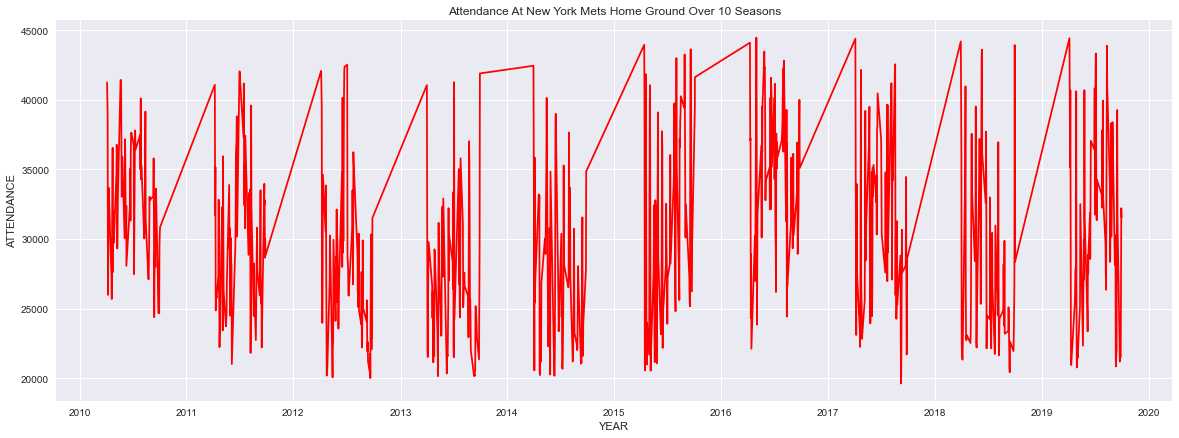

In [31]:
plt.figure(figsize=(20,7))
plt.plot(time_nym.index, time_nym, color = 'red')
plt.xlabel('YEAR')
plt.ylabel('ATTENDANCE')
plt.title('attendance at new york mets home ground over 10 seasons'.title())
plt.show()

In [32]:
time_nym.mean()

attendance   30038.20
dtype: float64

In [36]:
weekly_nym = time_nym.resample('W').mean()

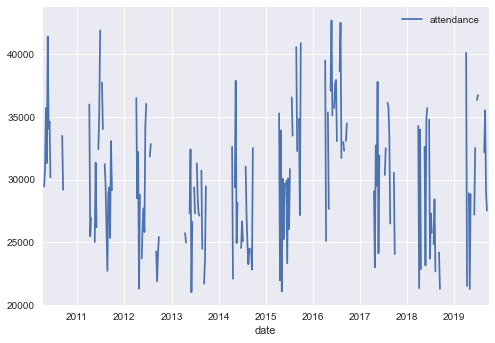

In [37]:
weekly_nym.plot()

In [33]:
#perform dickey fuller to see if our data is stationary
from statsmodels.tsa.stattools import adfuller
test = adfuller(time_nym)
dfoutput = pd.Series(test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
print(dfoutput)

Test Statistic                 -6.30
p-value                         0.00
#Lags Used                      6.00
Number of Observations Used   790.00
dtype: float64


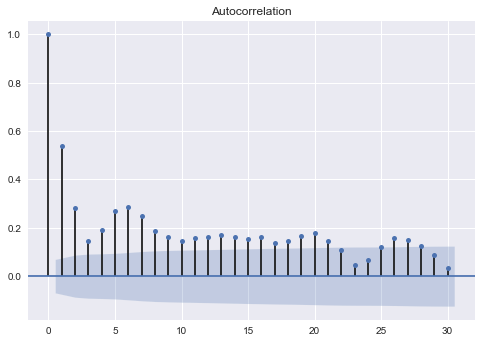

In [274]:
#ACF/PACF to determine which terms in include (MA or AR or Both?)
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(time_nym, alpha=.05); #plot autocorrelation for each lag (alpha is confidence interval)

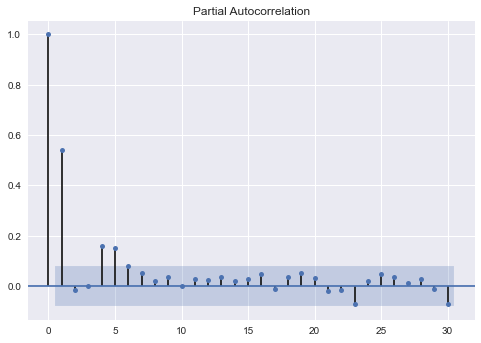

In [275]:
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(time_nym, alpha=.025, lags=30);